## Visualisation des données de consommation des métropoles françaises.

Sources :
1. https://odre.opendatasoft.com/explore/dataset/eco2mix-metropoles-tr/information/?disjunctive.libelle_metropole&disjunctive.nature
2. https://www.rte-france.com/eco2mix/telecharger-les-indicateurs

### Importations

In [34]:
import pandas as pd

####  Datasets

TO DO : fill na with day before data

In [35]:
path_conso_lyon = '/Users/matthiasmolenat/repos/congestion/data/eCO2mix_RTE_Grand-Lyon_En-cours-TR.csv'
path_conso_st_etienne = '/Users/matthiasmolenat/repos/congestion/data/eCO2mix_RTE_Saint-Etienne_En-cours-TR.csv'

path_list = [path_conso_lyon,path_conso_st_etienne]
df_list = []
for path in path_list:
    df_city = pd.read_csv(path, delimiter = ';', index_col=0)
    
    df_city['Date'] = pd.to_datetime(df_city.index)
    df_city['year'] = df_city['Date'].dt.year
    df_city['month'] = df_city['Date'].dt.month
    df_city['day'] = df_city['Date'].dt.day
    
    df_city = df_city[['year',	'month',	'day',  'Heures', 'Consommation', 'Echanges physiques']][df_city['year']==2023]
    df_city = df_city[df_city['Consommation']!= 'ND']
    df_city['Consommation'] = df_city['Consommation'].astype('int')
    df_list.append(df_city)

df_list[1].head()

/var/folders/73/pr8hlbx91tg9lbcjsv3sshsm0000gn/T/ipykernel_5097/4126536206.py:7: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_city = pd.read_csv(path, delimiter = ';', index_col=0)
/var/folders/73/pr8hlbx91tg9lbcjsv3sshsm0000gn/T/ipykernel_5097/4126536206.py:7: DtypeWarning: Columns (3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_city = pd.read_csv(path, delimiter = ';', index_col=0)


,year,month,day,Heures,Consommation,Echanges physiques
Date,,,,,,
2023-01-01,2023,1,1,00:00,174,150
2023-01-01,2023,1,1,00:15,177,153
2023-01-01,2023,1,1,00:30,168,144
2023-01-01,2023,1,1,00:45,167,143
2023-01-01,2023,1,1,01:00,158,134


#### Conso de la métropole de Lyon 2023

In [36]:
df_conso_Lyon_2023 = df_list[0]

<Axes: xlabel='Date'>

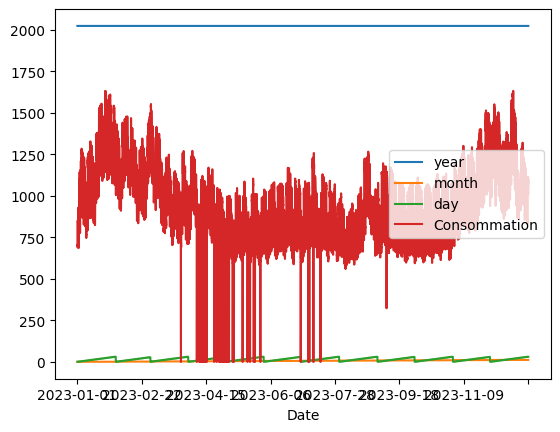

In [37]:
df_conso_Lyon_2023.plot()